In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from src import utils, plotting


pd.set_option('display.float_format', '{:,.2f}'.format)

In [32]:
ticker = "GDXJ"
period = "50y"
stock = yf.Ticker(ticker.upper())
history = stock.history(period=period)

/Users/ivankyulev/Projects/Notebooks/.venv/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [24]:
history.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
count,"2,265","2,265","2,265","2,265","2,265","2,265","2,265","2,265"
mean,31,31,30,31,"21,010",0,0,0
std,8,8,8,8,"37,624",0,0,0
min,14,14,14,14,0,0,0,0
25%,27,27,26,27,"4,599",0,0,0
50%,30,31,30,30,"11,932",0,0,0
75%,35,36,35,35,"25,451",0,0,0
max,55,60,53,55,"684,222",0,0,0


In [25]:
stock.cash_flow

""


In [26]:
stock.balance_sheet

""


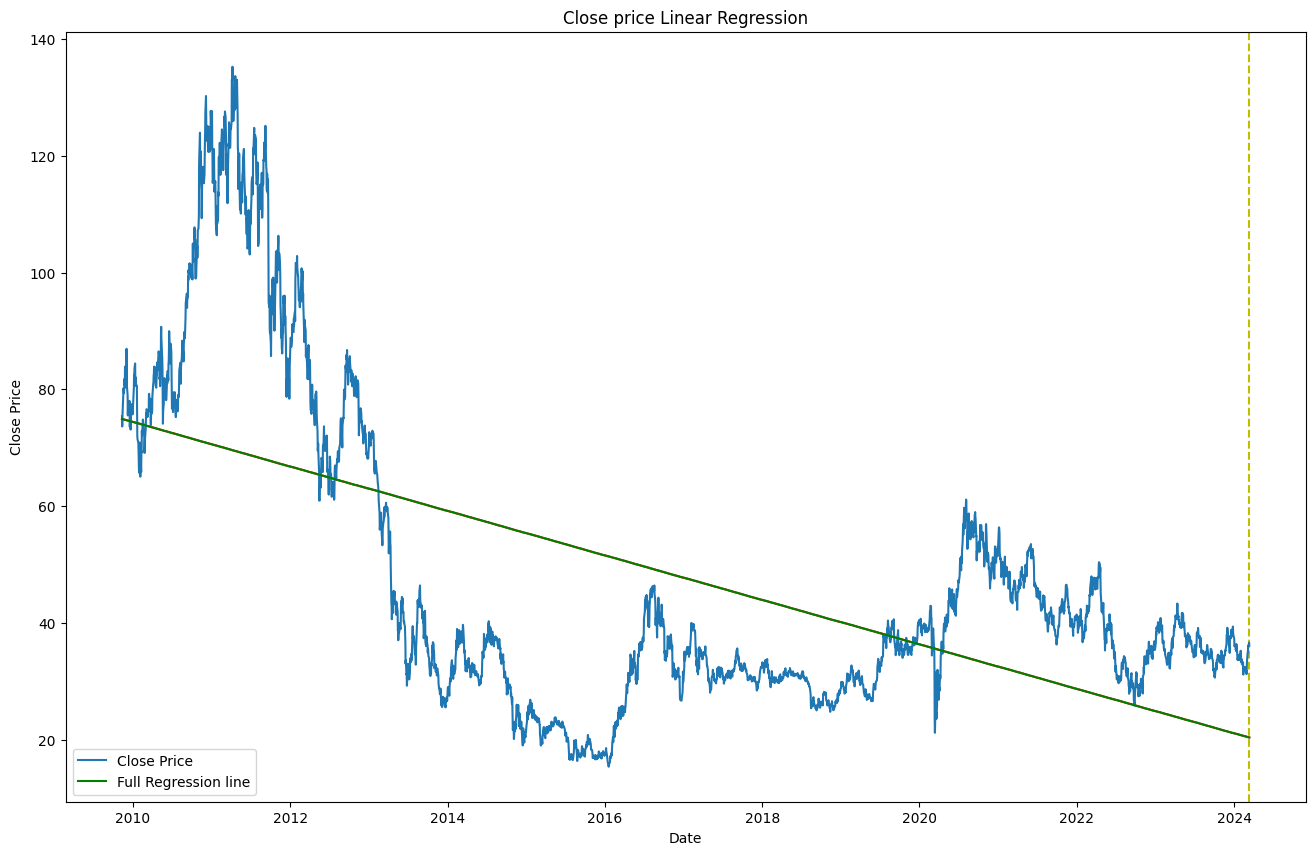

In [33]:
plotting.plot_regression_line(history, reg_line_count=1, log_scale=False)

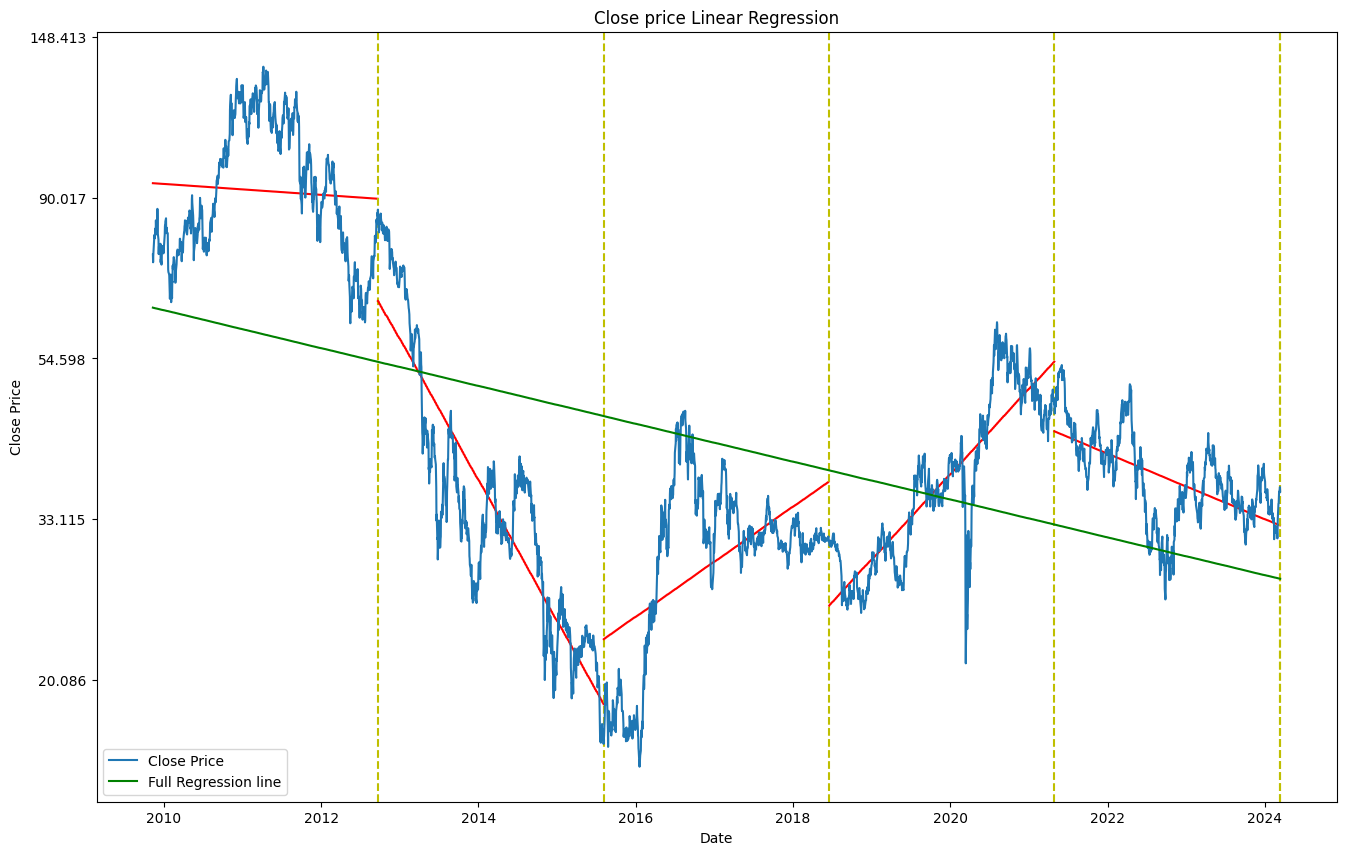

In [34]:
plotting.plot_regression_line(history, reg_line_count=5, log_scale=True)

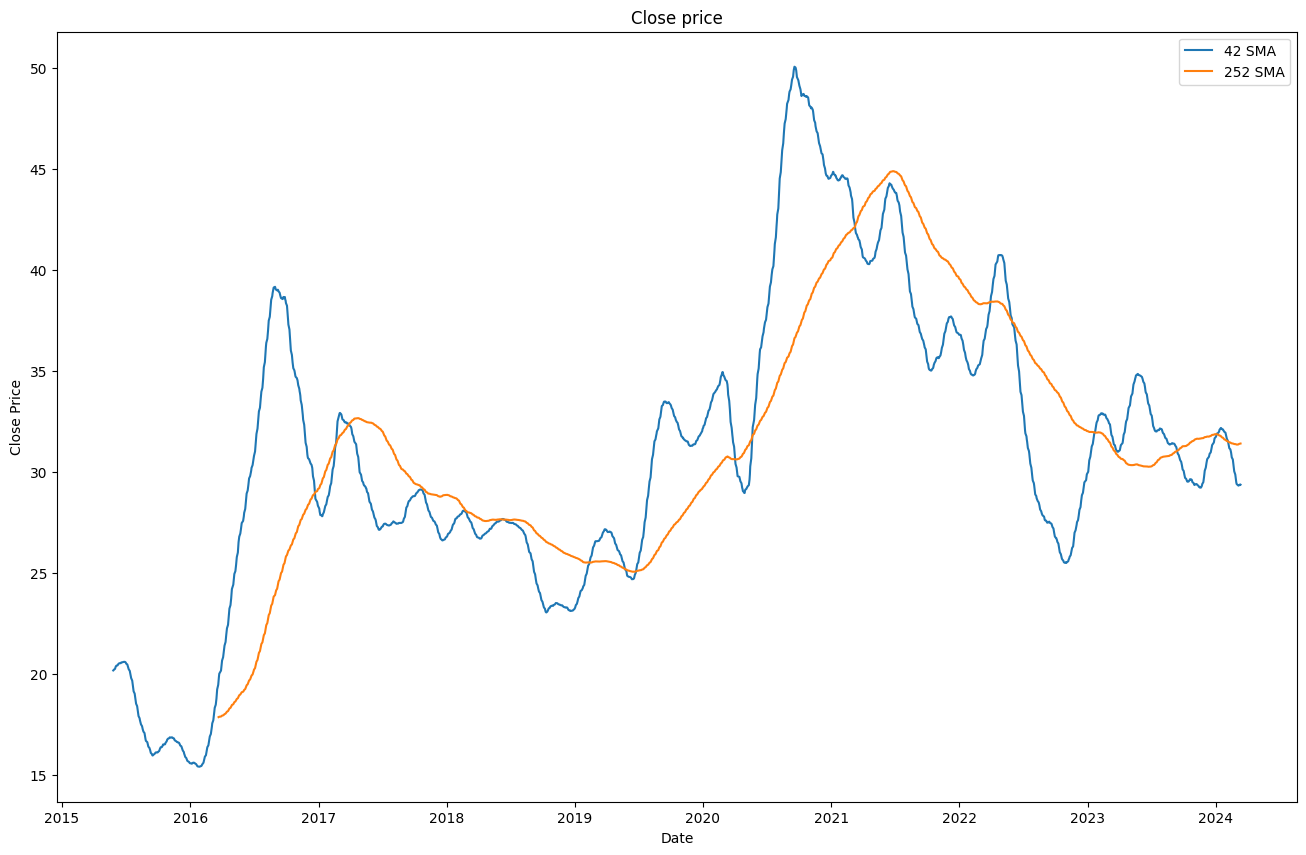

In [29]:
plotting.plot_sma(history, [42, 252], hide_data=True)